<a href="https://colab.research.google.com/github/patrickdias1/DS_patrickdias/blob/main/Panorama_do_Covid_19_no_Paraguai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do Covid-19 no Paraguai


COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

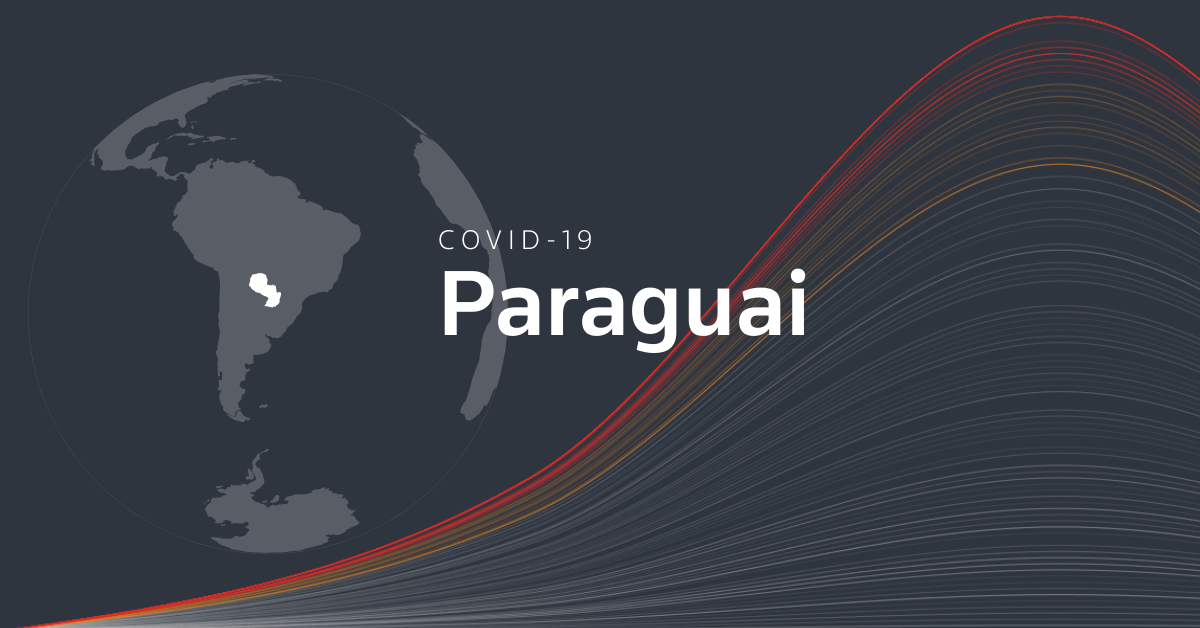

Até o presente momento, observa-se que cerca de 80% dos casos confirmados, no mundo, são assintomáticos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

# Obtenção dos Dados

Para esta análise, os dados utilizados são da World in Data, uma organização sem fins lucrativos, com sede em Londres e que tem por objetivo, realizar a difusão de dados a respeito dos grandes problemas que a humanidade vem enfrentando. 

Mais informações sobre a World in Data, neste link: https://ourworldindata.org/coronavirus

# Análise Exploratória dos Dados

Nesta parte, importaremos as bibliotecas necessárias para a análise dos dados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [3]:
# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

# verificando as primeiras entradas
df.head()

Dimensões do Dataset 
Variáveis:  67 
Entradas:  242214


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
# extrair os nomes das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
# verificando o tipo das variáveis
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

Como vimos ao analisar o tipo das variáveis, verificamos que a coluna date não está em formato datetime. Para que possamos explorar essa variável ao máximo, vamos transformá-la para o formato datetime.

In [6]:
# transformando a coluna data em datetime
df.date = pd.to_datetime(df.date)

In [7]:
# verificando a data mais recente do dataset
df.date.max()

Timestamp('2022-12-13 00:00:00')

In [8]:
# verificando a data mais antiga do dataset
df.date.min()

Timestamp('2020-01-01 00:00:00')

Para este trabalho, teremos dados provenientes do período de 01/01/2020 até 11/12/2022

# Análise Exploratória de Dados para o Paraguai

In [9]:
# Criar uma cópia do DataFrame apenas com o Paraguay
df_paraguay = df.loc[df.location == "Paraguay"].copy()

df_paraguay.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
170310,PRY,South America,Paraguay,2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,...,21.6,79.602,1.3,74.25,0.728,6780745.0,NaN,NaN,NaN,NaN
170311,PRY,South America,Paraguay,2020-03-08,1.0,1.0,NaN,NaN,NaN,NaN,...,21.6,79.602,1.3,74.25,0.728,6780745.0,NaN,NaN,NaN,NaN
170312,PRY,South America,Paraguay,2020-03-09,1.0,0.0,NaN,NaN,NaN,NaN,...,21.6,79.602,1.3,74.25,0.728,6780745.0,NaN,NaN,NaN,NaN
170313,PRY,South America,Paraguay,2020-03-10,5.0,4.0,NaN,NaN,NaN,NaN,...,21.6,79.602,1.3,74.25,0.728,6780745.0,NaN,NaN,NaN,NaN
170314,PRY,South America,Paraguay,2020-03-11,5.0,0.0,NaN,NaN,NaN,NaN,...,21.6,79.602,1.3,74.25,0.728,6780745.0,NaN,NaN,NaN,NaN


# Verificando as Datas dos Lançamentos dos Dados Provenientes do Paraguai

In [10]:
# data mais recente
print('Data mais recente',
    '\n\n  Dia: ',df_paraguay.date.max(), "\n"
      )


Data mais recente 

  Dia:  2022-12-12 00:00:00 



In [11]:
# data mais antiga
print('Data mais antiga',
    '\n\n  Dia: ',df_paraguay.date.min(), "\n"
      )

Data mais antiga 

  Dia:  2020-03-07 00:00:00 



Para o Paraguai, o período analisado será de 07/03/2020 até 11/12/2022

Agora, verificaremos quando ocorreu o primeiro caso de Covid-19 no Paraguai

# Primeiro Registro de Covid-19 no Paraguai

In [25]:
# identificaçãso do primeiro caso
df_paraguay.loc[df_paraguay['new_cases'] != 0.0].head(1)
print('O primeiro caso foi registrado em {}'.format(df_paraguay.date.loc[170310]))


O primeiro caso foi registrado em 2020-03-07 00:00:00


Nesta base de dados, o primeiro caso foi registrado no dia 07 de Março de 2020.

# Primeiro Morte de Covid-19 no Paraguai

In [27]:
# primeira morte
df_paraguay.loc[df_paraguay['new_deaths'] != 0.0].head(1)
print('A primeira morte foi registrada em {}'.format(df_paraguay.date.loc[170310]))

A primeira morte foi registrada em 2020-03-07 00:00:00


A data do primeiro registro de caso da doença coincide com a data do primeiro caso de morte. O que nos remete a um atraso no lançamento dos dados, considerando o primeiro caso de Covid-19.

# Plotando Gráficos

Text(0.5, 0, 'Período')

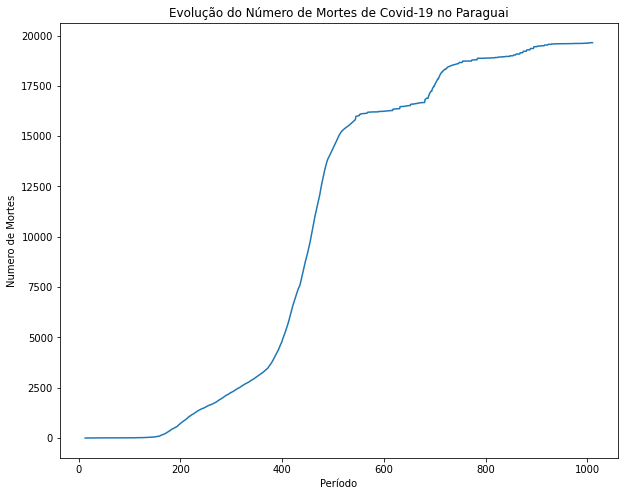

In [15]:
# Gráfico da Evolução do Número de Mortes neste país.
df_paraguay.loc[df_paraguay.location == "Paraguay", "total_deaths"].reset_index(drop=True).plot(figsize=(10,8));
plt.title("Evolução do Número de Mortes de Covid-19 no Paraguai")
plt.ylabel("Numero de Mortes")
plt.xlabel("Período")

Descobrindo o Número total de casos e a distribuição

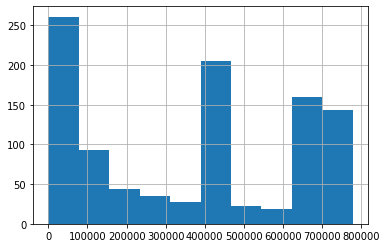

In [23]:
df_paraguay.loc[df_paraguay.location == "Paraguay", "total_cases"].hist()

Text(0.5, 0, 'Período')

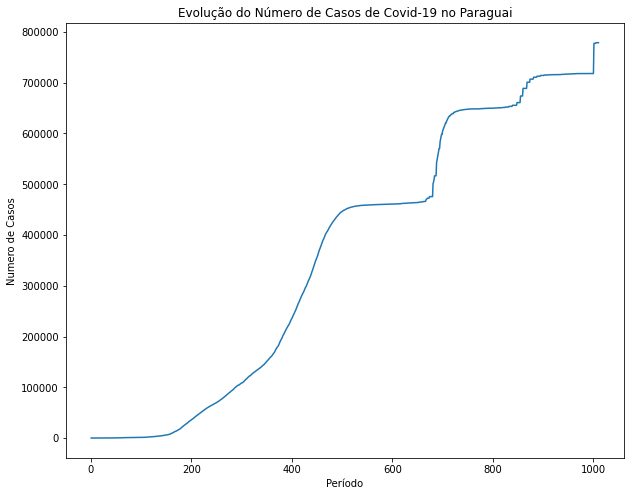

In [28]:
# Gráfico da Evolução do Número de Casos neste país.
df_paraguay.loc[df_paraguay.location == "Paraguay", "total_cases"].reset_index(drop=True).plot(figsize=(10,8));
plt.title("Evolução do Número de Casos de Covid-19 no Paraguai")
plt.ylabel("Numero de Casos")
plt.xlabel("Período")

São, aproximadamente, 800 mil casos de Covid-19 no Paraguai 